In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [15]:
df = pd.read_excel("2. Case 1 - Chi-square test of independence.xlsx")

In [16]:
# Print data head
df.head()

,Respondent,Uniqueness,Purchase Likelihood
0,1,Extremely unique,Extremely likely
1,2,Extremely unique,Extremely likely
2,3,Extremely unique,Extremely likely
3,4,Extremely unique,Extremely likely
4,5,Extremely unique,Extremely likely


In [17]:
# The Pandas crosstab function can be used to produce the contingency table from the raw data of responses
df_crosstab = pd.crosstab(df["Uniqueness"],df["Purchase Likelihood"])

In [18]:
# Sort the dataframe according to following lists to make it easier to read
sorter = ["Extremely likely","Very likely","Somewhat likely","Not so likely","Not at all likely"]
sorter2 = ["Extremely unique","Very unique","Somewhat unique","Not so unique","Not at all unique"]

# Sort dataframe
df_crosstab = df_crosstab.loc[sorter2]
df_crosstab = df_crosstab[sorter]

In [19]:
# Print contingency table with cells coloured according to magnitude
df_crosstab.style.background_gradient(cmap='Blues',vmin = 0,vmax = 100)

Purchase Likelihood,Extremely likely,Very likely,Somewhat likely,Not so likely,Not at all likely
Uniqueness,,,,,
Extremely unique,12,25,13,10,10
Very unique,52,104,64,30,30
Somewhat unique,15,28,16,15,16
Not so unique,7,16,8,10,9
Not at all unique,5,8,4,5,11


In [20]:
# Create contingency table in proportions using "normalize=True" in crosstab function
df_proportions = pd.crosstab(df["Uniqueness"],df["Purchase Likelihood"],normalize=True)

# Sort dataframe
df_proportions = df_proportions.loc[sorter2]
df_proportions = df_proportions[sorter]

# Print contingency table with cells coloured according to magnitude
df_proportions.style.background_gradient(cmap='Blues',vmin = 0,vmax = 0.2)

Purchase Likelihood,Extremely likely,Very likely,Somewhat likely,Not so likely,Not at all likely
Uniqueness,,,,,
Extremely unique,0.022945,0.047801,0.024857,0.019120,0.019120
Very unique,0.099426,0.198853,0.122371,0.057361,0.057361
Somewhat unique,0.028681,0.053537,0.030593,0.028681,0.030593
Not so unique,0.013384,0.030593,0.015296,0.019120,0.017208
Not at all unique,0.009560,0.015296,0.007648,0.009560,0.021033


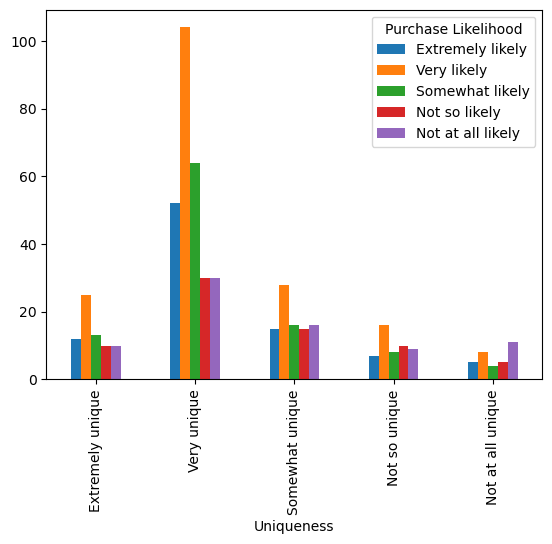

In [21]:
# Plot clustered bar chart to visualize
df_crosstab.plot.bar(rot=0)
plt.xticks(rotation=90)
plt.show()

Our goal is to examine the claim that the uniqueness of the packaging affects the propensity of consumers to buy the product based on the packaging. Therefore, the null and alternative hypotheses can be formulated as follows:
- H0: Uniqueness is not associated with 'Purchase intent'
- H1: Uniqueness is associated with 'Purchase intent'
    
The significance level alpha is set to 0.05.

We can now run the test.

In [22]:
# Store the output of the test function into variables
stat, p, dof, expected = chi2_contingency(df_crosstab, correction=False)

In [23]:
# Print results
print("chi2: " + str(stat))
print("p: " + str(p))
print("df: " + str(dof))
print("expected: " + str(expected))

chi2: 21.388569942634078
p: 0.1640533250506747
df: 16
expected: [[12.17973231 24.22562141 14.05353728  9.36902486 10.17208413]
 [48.71892925 96.90248566 56.21414914 37.47609943 40.68833652]
 [15.65965583 31.14722753 18.06883365 12.0458891  13.07839388]
 [ 8.6998088  17.3040153  10.03824092  6.69216061  7.26577438]
 [ 5.7418738  11.4206501   6.62523901  4.416826    4.79541109]]


The p-value (0.1641) exceeds the pre-established alpha of 0.05. This leads us not to reject the null hypothesis—suggesting no significant link between the product packaging's distinctiveness and the likelihood of consumers purchasing it at a significance level of 0.05. 